# Webscraping IMBD and Metacritic

### Get movie ratings following tutorial:

https://www.dataquest.io/blog/web-scraping-beautifulsoup/

Goal is to scrape 2000 ratings from each of IMBD and metacritic. It is worthwhile to examine the source websites, since this may mean as much as 4000 requests (~1 sec/request = ~hr total). An efficient methodology will likely pay time dividends.

https://www.imdb.com/

https://www.metacritic.com/

__General methodology__

1. Examine source for most efficient way to get max data on a single page
2. Examine URL to see if iterative scraping will make sense at that page
3. Scrape a single record and verify
4. Scrape a single page and verify, put records into lists
5. Scrape all pages using variable to iterate though URL, put records into lists
6. Convert lists to dataframe
7. Complete formatting of dataframe
8. Complete analysis of dataframe


In [1]:
from requests import get
from bs4 import BeautifulSoup


In [2]:
url = 'https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&sort=num_votes,desc&ref_=adv_prv'
responce = get(url)
print(responce.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


IMDB URL notes:
* release date (doesnt appear to be used to filter movies)
* sort by number of votes descending
* page #
* ref_ forwards or back

In [3]:
html_soup = BeautifulSoup(responce.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [4]:
#grab the first 50 movie containers
movie_containers = html_soup.find_all('div', class_='lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


 __Extracting data for a single movie__

In [5]:
first_movie = movie_containers[0]
print(first_movie.prettify())

<div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7286456">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt7286456/">
   <img alt="Joker" class="loadlate" data-tconst="tt7286456" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNGVjNWI4ZGUtNzE0MS00YTJmLWE0ZDctN2ZiYTk2YmI3NTYyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt7286456/">
    Joker
   </a>
   <span class="lister-item-year text-muted unbold">
    (2019)
   </span>
  </h3>
  <p class="text-muted">
   <span class="certificate">
    14A
   </span>
   <span class="ghost">
    |
   </span>
   <s

In [6]:
#Title
first_name = first_movie.h3.a.text
first_name

'Joker'

In [7]:
#Release Year
first_year = first_movie.h3.find('span', class_='lister-item-year text-muted unbold').text
first_year

'(2019)'

In [8]:
#IMBD rating
first_imbd = float(first_movie.strong.text)
first_imbd

8.5

In [9]:
#Metascore
first_mscore = first_movie.find('span', class_='metascore') #so all metascores can be found
first_mscore = int(first_mscore.text)
first_mscore

59

In [10]:
#Number of votes
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes = int(first_votes['data-value'])
first_votes

746980

In [11]:
#Generalized to scraping data for a page
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

#Extract data from individual move container
for container in movie_containers:
    
    #If movie has metascore, extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        #Title
        name = container.h3.a.text
        names.append(name)

        #Year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)

        #IMBD rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        #Metascore
        m_score = container.find('span', class_='metascore').text
        metascores.append(int(m_score))

        #Number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [12]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes
                       })
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
movie        38 non-null object
year         38 non-null object
imdb         38 non-null float64
metascore    38 non-null int64
votes        38 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ KB
None


,movie,year,imdb,metascore,votes
0,Joker,(2019),8.5,59,746980
1,Avengers: Endgame,(2019),8.4,78,693795
2,Once Upon a Time... in Hollywood,(2019),7.7,83,432859
3,Captain Marvel,(2019),6.9,64,403990
4,Gisaengchung,(2019),8.6,96,358067
5,Star Wars: Episode IX - The Rise of Skywalker,(2019),6.7,53,295363
6,Spider-Man: Far from Home,(2019),7.5,69,277927
7,The Irishman,(2019),7.9,94,272596
8,1917,(2019),8.4,78,271278
9,Knives Out,(2019),8.0,82,264701


__Scraping multiple pages__

Will need to query website for first 4 pages of movies for the last 20 years, each page has 50 movies. This should lead to ~4000 movies (less since some will not have a metascore).

In [13]:
#pages to query
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000, 2020)]

In [14]:
#Control crawl rate to not have IP banned, will pause for random amounts of time
from time import sleep
from random import randint

In [15]:
#monitor request (since there are 80 pages to crawl)
from time import time

start_time = time()
requests = 0
for _ in range(5):
    #A request goes here
    requests +=1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))


Request: 1; Frequency: 0.3331897083141092 requests/s
Request: 2; Frequency: 0.49979584807474275 requests/s
Request: 3; Frequency: 0.49984479795888065 requests/s
Request: 4; Frequency: 0.5712757130349839 requests/s
Request: 5; Frequency: 0.5553134160881887 requests/s


In [16]:
from warnings import warn
warn("Warning Simulation")

C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [17]:
headers = {"Accept-Language": "en-USA, en;q=0.5"}

In [21]:
#Redeclare lists
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

#Starttime setup
start_time = time()
requests = 0

#Loop through years
for year_url in years_url:
    
    #Loop through pages 1-4
    for page in pages:
        
        #Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)
        
        #Pause loop
        sleep(randint(1,15))
        
        #monitor requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

        #Throw a warning for non 200
        if response.status_code != 200:
            warn('Request: {}, Status code: {}'.format(requests, response.status_code))
            
        #break the loop if required
        if requests > 80:
            warn('Number of requests higher than expected')
            break
            
        #parse contents
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        #select containers
        mv_containers = page_html.find_all('div', class_= 'lister-item mode-advanced')
        
        
        #Extract data from individual move container
        for container in mv_containers:

            #If movie has metascore, extract:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                #Title
                name = container.h3.a.text
                names.append(name)

                #Year
                year = container.h3.find('span', class_='lister-item-year').text
                years.append(year)

                #IMBD rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                #Metascore
                m_score = container.find('span', class_='metascore').text
                metascores.append(int(m_score))

                #Number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request: 1; Frequency: 0.08382173843357839 requests/s
Request: 2; Frequency: 0.09931286469274989 requests/s
Request: 3; Frequency: 0.09255556272568484 requests/s
Request: 4; Frequency: 0.08665615267368598 requests/s
Request: 5; Frequency: 0.07993899705298059 requests/s
Request: 6; Frequency: 0.08971913294247423 requests/s
Request: 7; Frequency: 0.08633209797912936 requests/s
Request: 8; Frequency: 0.08848073573803845 requests/s
Request: 9; Frequency: 0.0938912669392979 requests/s
Request: 10; Frequency: 0.09784166298056918 requests/s
Request: 11; Frequency: 0.10044811779533507 requests/s
Request: 12; Frequency: 0.1045157659455924 requests/s
Request: 13; Frequency: 0.09994248820345016 requests/s
Request: 14; Frequency: 0.0982281125889532 requests/s
Request: 15; Frequency: 0.10085340773953261 requests/s
Request: 16; Frequency: 0.09944249321531695 requests/s
Request: 17; Frequency: 0.10351171826235495 requests/s
Request: 18; Frequency: 0.10250641575195817 requests/s
Request: 19; Frequency

In [23]:
movie_ratings = pd.DataFrame({'movie': names,
                             'year': years,
                             'imdb': imdb_ratings,
                             'metascore': metascores,
                             'votes': votes
                             })

print(movie_ratings.info())
movie_ratings.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
movie        3612 non-null object
year         3612 non-null object
imdb         3612 non-null float64
metascore    3612 non-null int64
votes        3612 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 141.2+ KB
None


,movie,year,imdb,metascore,votes
3602,Jumanji: The Next Level,(2019),6.7,58,127264
3603,Pokémon Detective Pikachu,(2019),6.6,53,120891
3604,Godzilla: King of the Monsters,(2019),6.1,48,115770
3605,Terminator: Dark Fate,(2019),6.3,54,113607
3606,6 Underground,(2019),6.1,41,112851
3607,Rocketman,(I) (2019),7.3,69,105682
3608,Zombieland: Double Tap,(2019),6.8,55,100066
3609,Frozen II,(2019),7.0,64,99556
3610,Doctor Sleep,(2019),7.4,59,94391
3611,The Gentlemen,(2019),8.0,51,94296


In [43]:
len(movie_ratings)

3612

In [24]:
#convert years to int, see what types we have first
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)',
       '(I) (2017)', '(2018)', '(I) (2018)', '(III) (2018)', '(2019)',
       '(II) (2019)', '(I) (2019)'], dtype=object)

In [25]:
movie_ratings.loc[:,'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [26]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes
3602,Jumanji: The Next Level,2019,6.7,58,127264
3603,Pokémon Detective Pikachu,2019,6.6,53,120891
3604,Godzilla: King of the Monsters,2019,6.1,48,115770
3605,Terminator: Dark Fate,2019,6.3,54,113607
3606,6 Underground,2019,6.1,41,112851
3607,Rocketman,2019,7.3,69,105682
3608,Zombieland: Double Tap,2019,6.8,55,100066
3609,Frozen II,2019,7.0,64,99556
3610,Doctor Sleep,2019,7.4,59,94391
3611,The Gentlemen,2019,8.0,51,94296


In [27]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [29]:
#normalize imdb to a 0-100 scale
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(5)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1277850,85.0
1,Memento,2000,8.4,80,1074713,84.0
2,Snatch,2000,8.3,55,751137,83.0
3,Requiem for a Dream,2000,8.3,68,732569,83.0
4,X-Men,2000,7.4,64,554133,74.0


In [30]:
#save file
movie_ratings.to_csv('movie_ratings.csv')

### Analysis of distribution of movie

In [32]:
import seaborn as sns

Text(0, 0.5, 'Density')

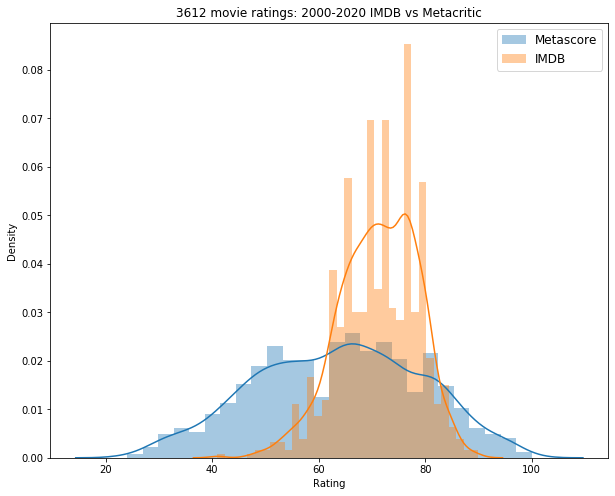

In [44]:
plt.figure(figsize = (10,8))

sns.distplot(movie_ratings['metascore'], label = 'Metascore')
sns.distplot(movie_ratings['n_imdb'], label = 'IMDB')

plt.legend(prop = {'size': 12})
plt.title("3612 movie ratings: 2000-2020 IMDB vs Metacritic")
plt.xlabel('Rating')
plt.ylabel('Density')

In [52]:
movie_ratings['metascore'].describe()

count    3612.000000
mean       63.643411
std        15.586643
min        24.000000
25%        52.000000
50%        64.000000
75%        75.000000
max       100.000000
Name: metascore, dtype: float64

In [53]:
movie_ratings['n_imdb'].describe()

count    3612.000000
mean       71.211517
std         7.331725
min        41.000000
25%        66.000000
50%        72.000000
75%        77.000000
max        90.000000
Name: n_imdb, dtype: float64

__Outcome__

Able to successfully scrape IMDB.com for metacritic and imdb scores for ~3600 movies from 2000-2020. Used html parsing and beautiful soup to process data. Fed into dataframe for analysis and munged/cleaned.

IMDB ratings tend to have a heavy central tendency around 71%, with a std of 7.3

Metacritic ratings tend to have a more widely distributed score with a mean of 63%, and a std of 15.6. The data also shows relatively few ratings in the areas of 50% and 75%. Perhaps this is due to a tendency to avoid round quartile scores.

Data saved locally for further analysis.